####  SST (DJF) trend in CESM-HR over the period 1980-2020
- Read HIST
- Read RCP85
- Seasonal average
- Calculate trend
- Plotting
 
Ming Ge April 2025

In [1]:
import glob
import os
from pathlib import Path
import numpy as np
import xarray as xr
 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import ticker, cm

import warnings 
warnings.filterwarnings("ignore")

#### Define some functions

#### Read HIST

In [2]:
%%time
dir_o  = '/glade/campaign/mmm/c3we/mingge/CESM-HR/'
flnm_o = dir_o + 'sstTrend_DJF_1980-2020.nc'

n_mem = 10

year_s = 1980
year_e = 2020
n_year = year_e - year_s + 1

# Monthly Dec SST timed as 01-01
# Dec. Jan Feb
selected_months = [1, 2, 3]  
n_mon = len(selected_months)
start_date = str(year_s) + '-01-01'
end_date   = str(year_e) + '-03-01'

dir_hr = '/glade/campaign/collections/rda/data/d651007/'

name_0 = 'b.e13.BHISTC5.ne120_t12.cesm-ihesp-'
name_1 = '-1920-2005.'

period_1d = ['197001-197912','198001-198912', '199001-199912', '200001-200512']
n_period = len(period_1d)

if os.path.isfile(flnm_o):
    print(flnm_o, 'exist')
else:
    is_first = True
    for nm in range(n_mem):
        if nm == 0:
            member_name = name_0 + 'sehires38-1850-2005.001'
        elif nm==1 or nm==2:
            member_name = name_0 + 'hires1.0.30' + name_1 + str(nm+1).zfill(3)
        elif nm==3 or nm==4:
            member_name = name_0 + 'hires1.0.44' + name_1 + str(nm+1).zfill(3)
        elif nm==5:
            member_name = name_0 + 'hires1.0.45' + name_1 + str(nm+1).zfill(3)
        else:
            member_name = name_0 + 'hires1.0.46' + name_1 + str(nm+1).zfill(3)

        dir_0 = dir_hr + member_name + '/ocn/proc/tseries/month_1/'
        nmon_s = 0
        for nn in range(n_period):
            
            flnm = dir_0 + member_name + \
                '.pop.h.SST.'+ period_1d[nn] + '.nc'
            
            with xr.open_dataset(flnm) as ds:
                print(flnm)
                # select data corresponding to selected_months
                sst = ds.SST.sel(time=ds.time.dt.month.isin(selected_months)) \
                            .sel(time=slice(None, end_date))\
                            .sel(time=slice(start_date, None))
                nmon_e = nmon_s + sst.shape[0]
                 
                if is_first == True:
                    n_lat = sst.shape[1]
                    n_lon = sst.shape[2]
                    data_4d = np.zeros((n_mem, n_year*n_mon, n_lat, n_lon))
                    is_first = False
                
                print(nmon_s,nmon_e)
                data_4d[nm, nmon_s:nmon_e] = sst
                nmon_s=nmon_e
          

/glade/campaign/mmm/c3we/mingge/CESM-HR/sstTrend_DJF_1980-2020.nc exist
CPU times: user 240 μs, sys: 66 μs, total: 306 μs
Wall time: 308 μs


#### Read CESM HR RCP85 (2006-2100) simulations.

In [3]:
%%time
dir_hr = '/glade/campaign/collections/rda/data/d651009/'

name_0 = 'b.e13.BRCP85C5.ne120_t12.cesm-ihesp-'
name_1 = '-2006-2100.'

period_1d = ['200601-201512', '201601-202512']
n_period = len(period_1d)

if os.path.isfile(flnm_o):
    print(flnm_o, 'exist')
else:
    is_first = True
    for nm in range(n_mem):
        if nm == 0:
            member_name = name_0 + 'sehires38' + name_1 + str(nm+1).zfill(3)
        elif nm==1:
            member_name = name_0 + 'hires1.0.30' + name_1 + str(nm+1).zfill(3)
        elif nm==2:
            member_name = name_0 + 'hires1.0.31' + name_1 + str(nm+1).zfill(3)
        elif nm==4 or nm==3:
            member_name = name_0 + 'hires1.0.44' + name_1 + str(nm+1).zfill(3)
        else:
            member_name = name_0 + 'hires1.0.46' + name_1 + str(nm+1).zfill(3)

        dir_0 = dir_hr + member_name + '/ocn/proc/tseries/month_1/'
        nmon_s = 79
        for nn in range(n_period):
            flnm = dir_0 + member_name + \
                '.pop.h.SST.'+ period_1d[nn] + '.nc'
            
            with xr.open_dataset(flnm) as ds:
                print(flnm)
                # select data corresponding to selected_months
                sst = ds.SST.sel(time=ds.time.dt.month.isin(selected_months)) \
                            .sel(time=slice(None, end_date))
                nmon_e = nmon_s + sst.shape[0]

                print(nmon_s,nmon_e)
                data_4d[nm, nmon_s:nmon_e] = sst
                nmon_s=nmon_e


/glade/campaign/mmm/c3we/mingge/CESM-HR/sstTrend_DJF_1980-2020.nc exist
CPU times: user 295 μs, sys: 81 μs, total: 376 μs
Wall time: 380 μs


#### seasonal average

In [4]:
if os.path.isfile(flnm_o):
    print(flnm_o, 'exist')
else:
    # 3 months average
    # data_4d = np.zeros((n_mem, n_year*n_mon, n_lat, n_lon))
    prec_4d = np.zeros((n_mem, n_year, n_lat, n_lon))
    nn = 0
    n_s = 0
    for ny in range(n_year):        
        n_e = n_s + 3
        prec_4d[:,ny] = np.mean(data_4d[:,n_s:n_e], axis=1) 
        nn =+ 1
        n_s = n_e

    plt.imshow(data_4d[0,-1])
    plt.show()
    plt.imshow(prec_4d[0,-1])
    plt.show()


/glade/campaign/mmm/c3we/mingge/CESM-HR/sstTrend_DJF_1980-2020.nc exist


#### Calculate trend

In [5]:
%%time
if os.path.isfile(flnm_o):
    print(flnm_o, 'exist')
else:
    # Fill value -99
    trend_3d = np.zeros((n_mem, n_lat, n_lon)) - 99
    # Time vector for regression
    tt = np.arange(n_year)

    # Loop over mem, lat-lon grid and fit a linear trend
    for nm in range(n_mem):
        print(nm)
        for ii in range(n_lat):
            for jj in range(n_lon):
                if prec_4d[nm, 0, ii, jj] != -1:
                    #print(ii, jj)
                    yy = prec_4d[nm, :, ii, jj]
                    # Fit line: degree=1 returns [slope, intercept]
                    slope, intercept = np.polyfit(tt, yy, 1)
                    trend_3d[nm, ii, jj] = slope  # Save the trend (slope)

    # Create the DataArray
    trend_da = xr.DataArray(
        trend_3d,
        dims=['member', 'lat', 'lon'],
        #coords={'member': mem, 'lat': lat, 'lon': lon},
        name='prec_trend'
    )

    # Combine into a Dataset
    ds = xr.Dataset({
        "prec_trend": trend_da,
        "TLAT": ds.TLAT,
        "TLON": ds.TLONG
    })

    ds.to_netcdf(flnm_o)

/glade/campaign/mmm/c3we/mingge/CESM-HR/sstTrend_DJF_1980-2020.nc exist
CPU times: user 234 μs, sys: 0 ns, total: 234 μs
Wall time: 236 μs


#### Plotting

In [11]:
with xr.open_dataset(flnm_o) as ds:
    print(ds)
    prec_trend = 10*ds.prec_trend

<xarray.Dataset> Size: 1GB
Dimensions:     (member: 10, lat: 2400, lon: 3600, nlat: 2400, nlon: 3600)
Coordinates:
    TLONG       (nlat, nlon) float64 69MB ...
    ULAT        (nlat, nlon) float64 69MB ...
    ULONG       (nlat, nlon) float64 69MB ...
    TLAT        (nlat, nlon) float64 69MB ...
Dimensions without coordinates: member, lat, lon, nlat, nlon
Data variables:
    prec_trend  (member, lat, lon) float64 691MB ...
    TLON        (nlat, nlon) float64 69MB ...


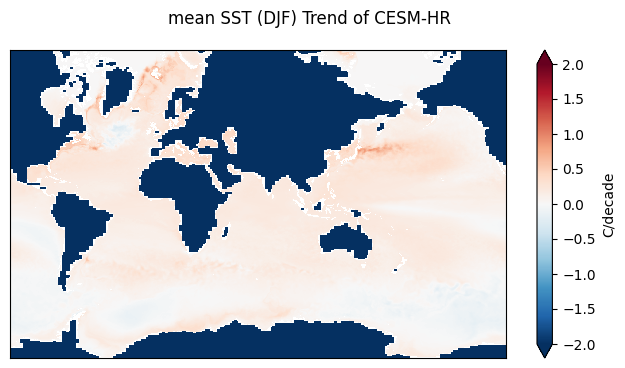

In [22]:
vmin = -2
vmax = 2
prec_trend.mean(dim="member").plot(figsize=(8, 4),
                                    vmin=vmin, vmax=vmax, 
                                    cmap='RdBu_r',  
                                    extend='both', 
                                    #levels=np.arange(0, 36, 1), 
                                    cbar_kwargs={'label': 'C/decade'})
plt.xticks([])
plt.yticks([])
plt.xlabel("")
plt.ylabel("")
plt.suptitle("mean SST (DJF) Trend of CESM-HR", fontsize=12);

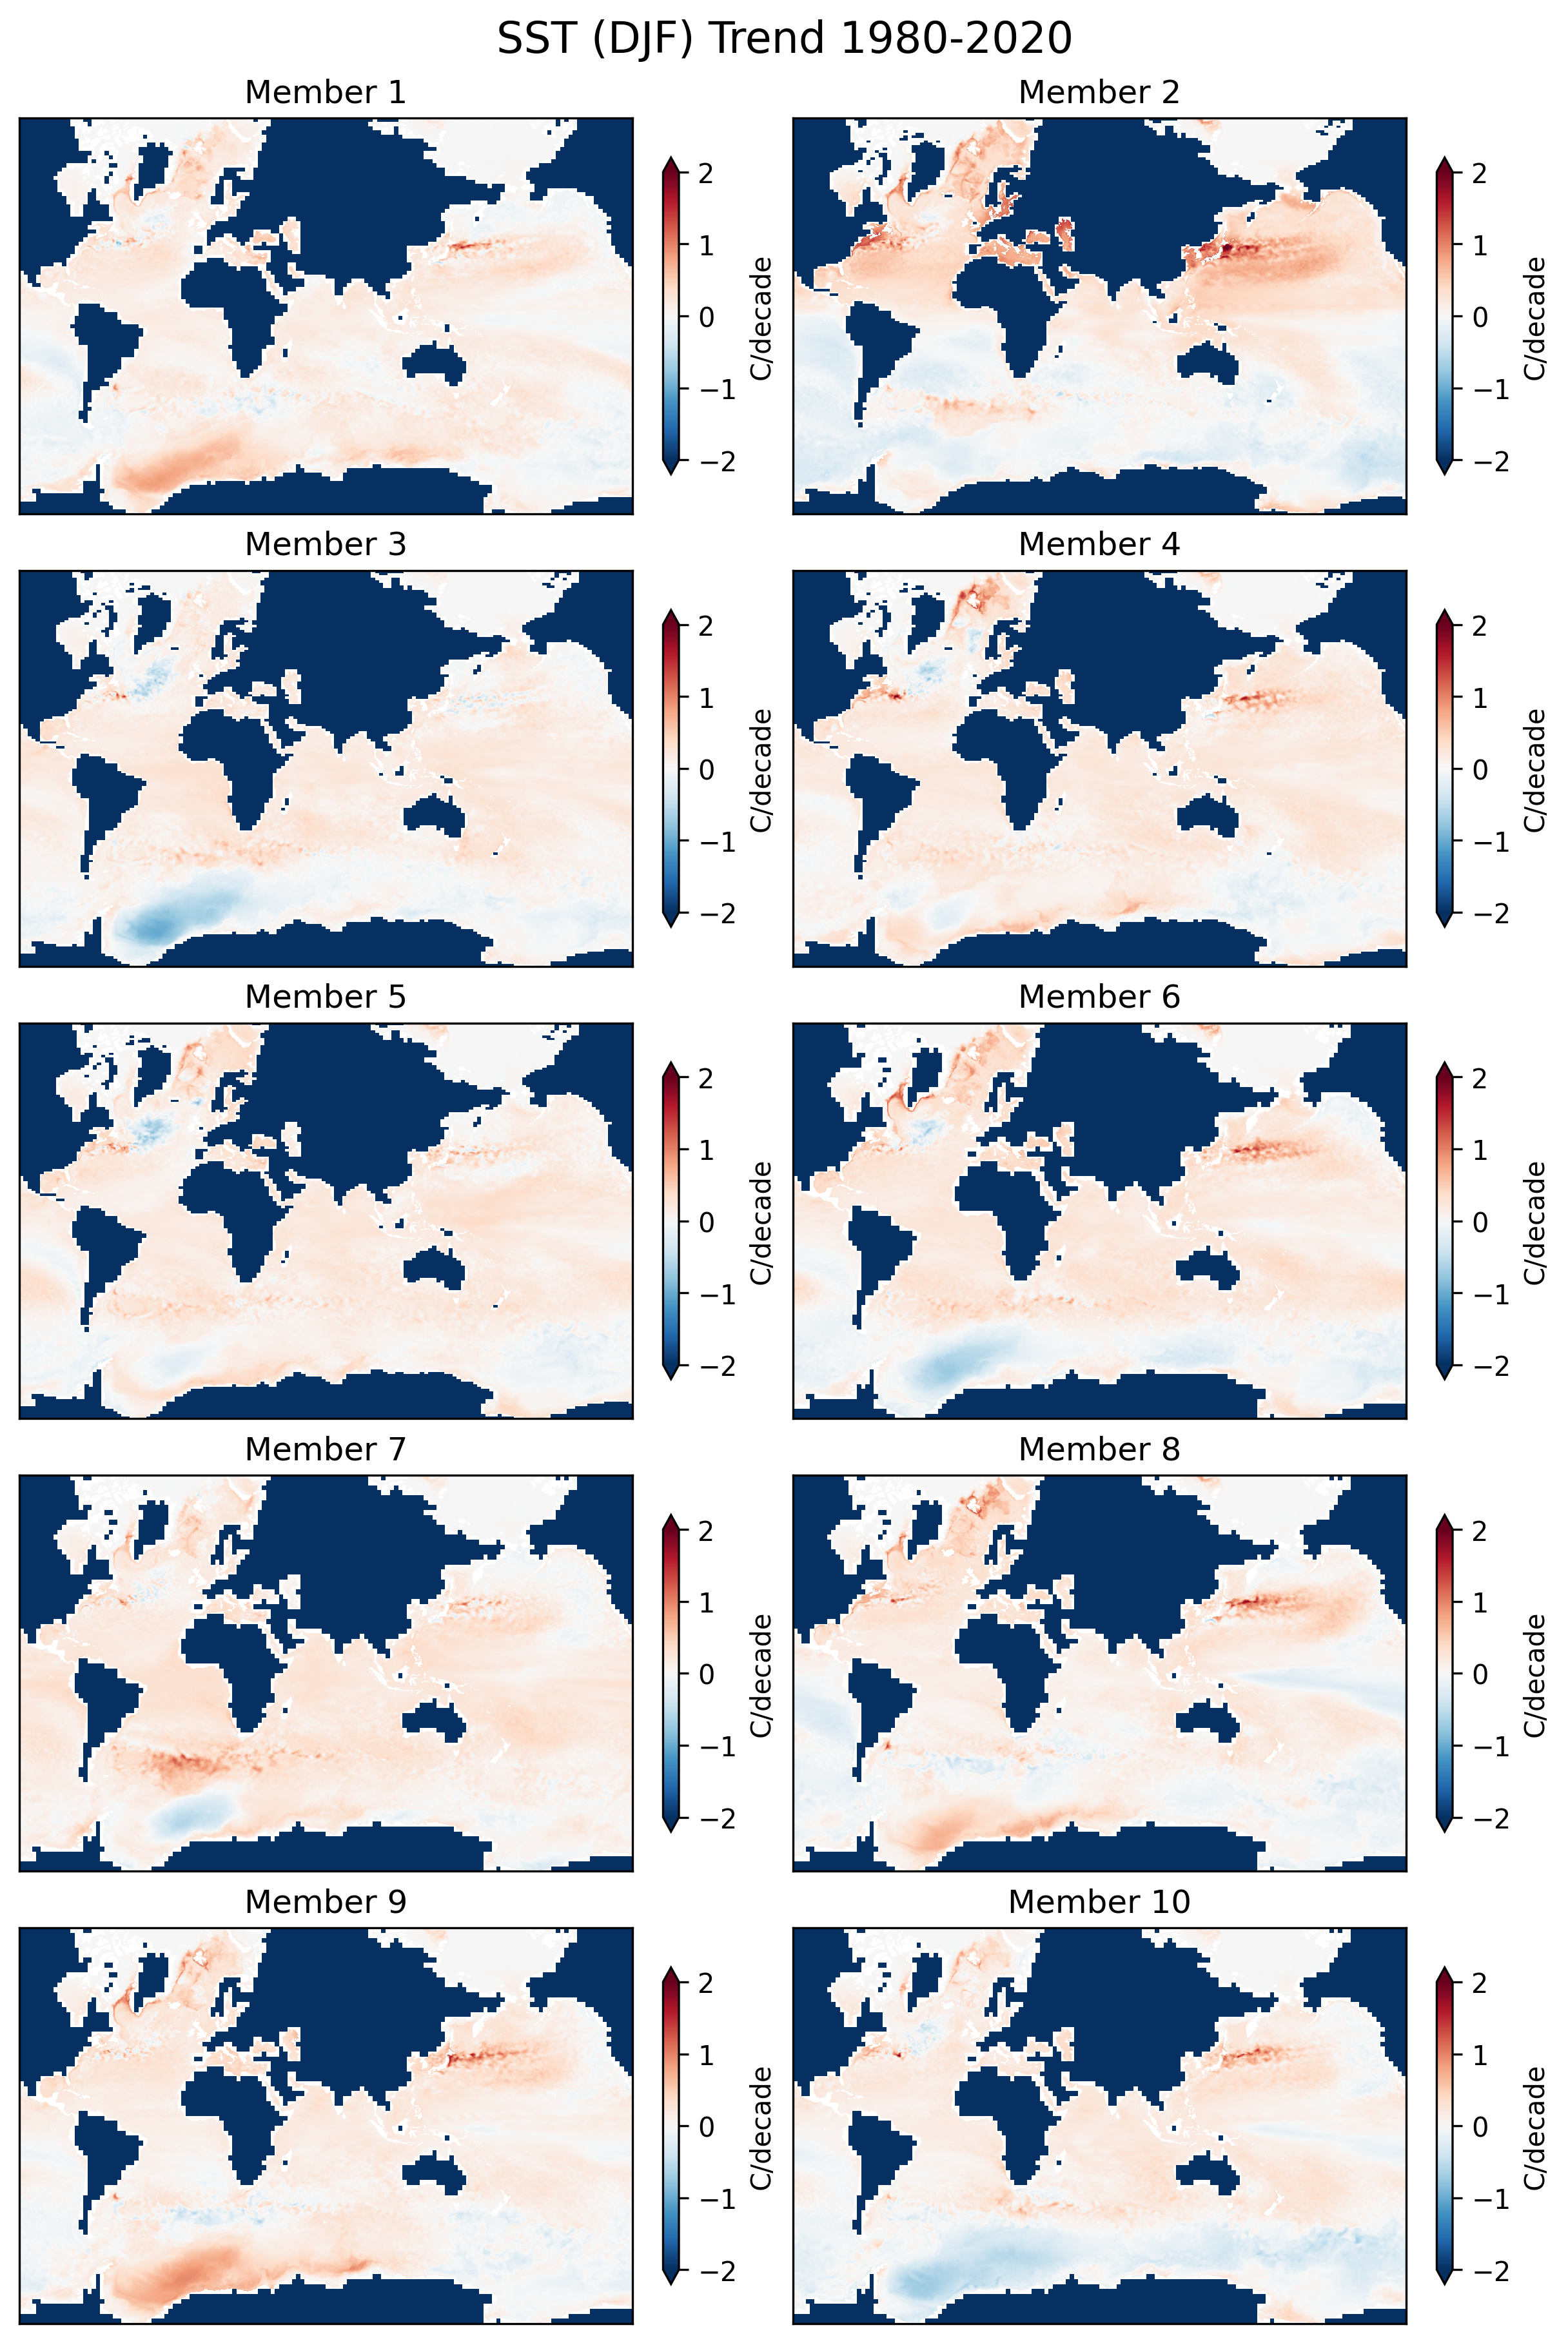

In [24]:
# Create 5 rows × 2 columns subplot grid for 10 members
fig, axes = plt.subplots(5, 2, figsize=(8, 12), constrained_layout=True, dpi=300)

for nm in range(n_mem):
    ax = axes.flat[nm]
    prec_trend.isel(member=nm).plot(
        ax=ax,
        vmin=vmin, vmax=vmax,  
        cmap="RdBu_r",
        extend='both',
        cbar_kwargs={"label": "C/decade", "shrink": 0.8}
    )
    ax.set_title("Member " + str(nm+1))
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xticks([])
    ax.set_yticks([])
     
plt.suptitle("SST (DJF) Trend 1980-2020", fontsize=16)
plt.show()